<a href="https://colab.research.google.com/github/PaulinaRuizB/Signal_Theory/blob/main/Task1_Ergodic_process2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ensemble and Time Averages in Signal Theory

In signal theory, especially when dealing with **random processes**, we use the concepts of **ensemble average** and **time average** to describe and analyze signals statistically.

## Time Average

The **time average** of a signal $x(t)$ over a time period $T$ is defined as:

$langle x(t) \rangle_T = \frac{1}{T} \int_{t_0}^{t_0 + T} x(t) \, dt$

If this value converges as $T \to \infty$, the **infinite time average** is defined as:

$\langle x(t) \rangle = \lim_{T \to \infty} \frac{1}{T} \int_{-T/2}^{T/2} x(t) \, dt$

### Random Signals
For **random signals**, each realization $x_i(t)$ can have a different behavior over time. Therefore, we may or may not get a meaningful time average depending on whether the signal is **ergodic**.

---

##Ensemble Average

The **ensemble average** is the average taken over **all possible realizations** of a random process at a specific time \( t \). It is defined as:

$E[x(t)] = \int_{-\infty}^{\infty} x \cdot p_{x(t)}(x) \, dx$

Where $p_{x(t)}(x)$ is the **probability density function (PDF)** of the process at time \( t \).

### Random Signals
For random processes, ensemble average gives the **expected value** at a specific time:

$E[x(t)] = \mu_x(t)$

If the process is **stationary**, then $\mu_x(t) = \mu_x$, a constant.

---

## Ergodicity

A process is **ergodic in the mean** if the **time average equals the ensemble average**:

$langle x(t) \rangle = E[x(t)]$

In practice, this means we can compute averages using **one signal realization** over time instead of needing all possible realizations.

---

## Summary Table

| Signal Type     | Time Average                    | Ensemble Average                  |
|------------------|----------------------------------|------------------------------------|
| Constant         | $langle x(t) \rangle = C$   | $E[x(t)] = C $                 |
| Random (ergodic) | $langle x(t) \rangle = \mu $ | $E[x(t)] = \mu$               |
| Random (non-ergodic) | May not converge            | Well-defined if PDF is known      |



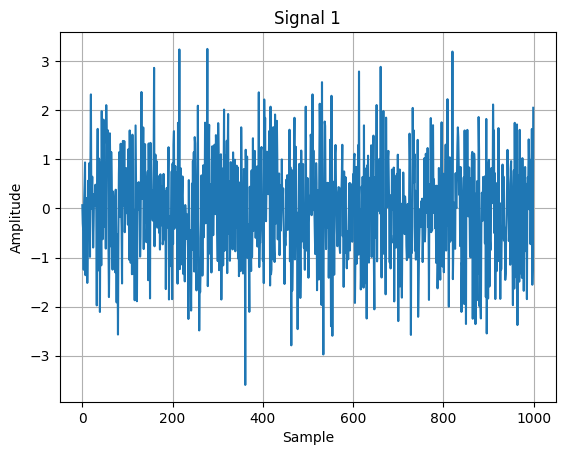

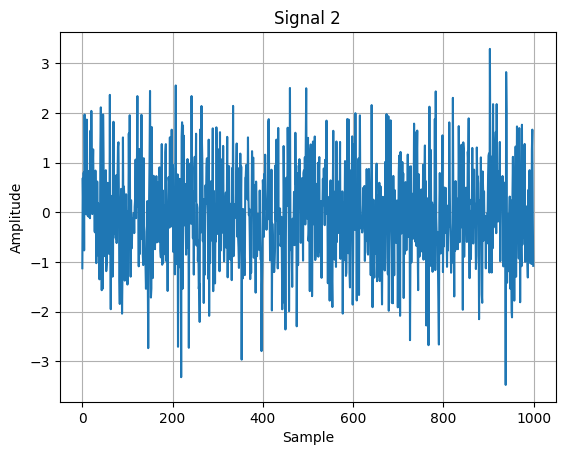

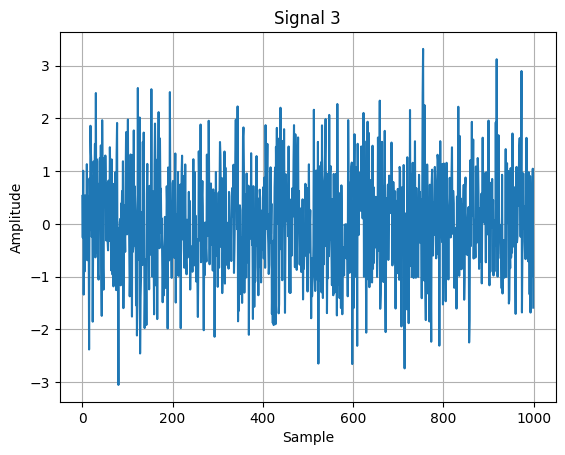

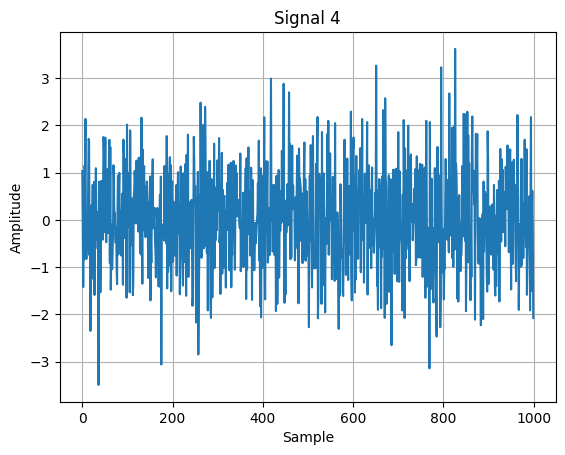

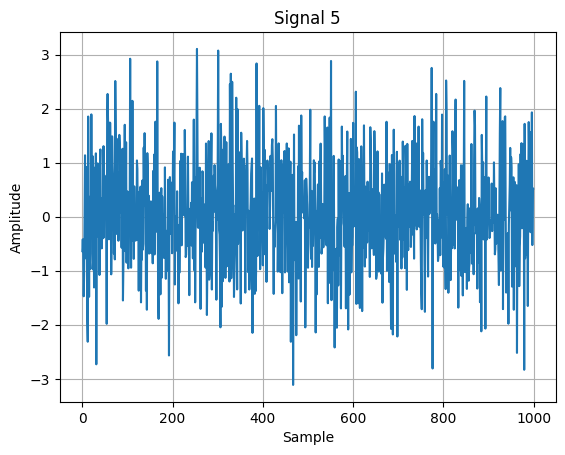

===== TIME AVERAGE (512 signals) =====
Average Time Mean: 0.0002
Average Time Variance: 0.9977

===== ENSEMBLE AVERAGE (1000 time points) =====
Average Ensemble Mean: 0.0002
Average Ensemble Variance: 0.9968

===== ERGODICITY COMPARISON =====
Difference in Mean: 0.000000
Difference in Variance: 0.000893
✅ The process is approximately *ergodic* (time avg ≈ ensemble avg)


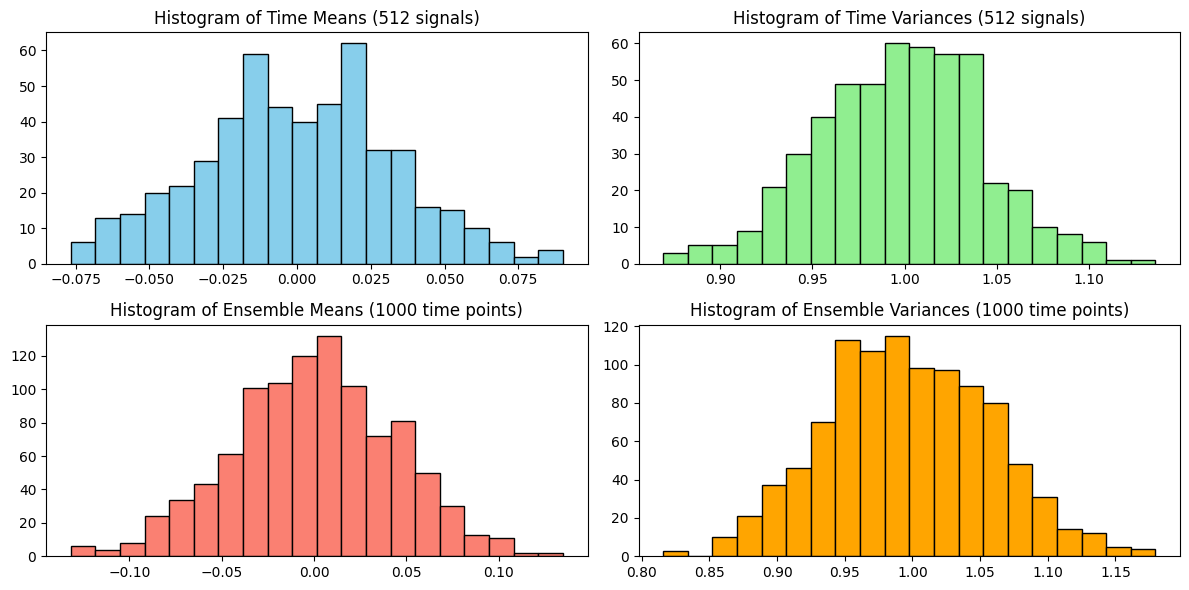

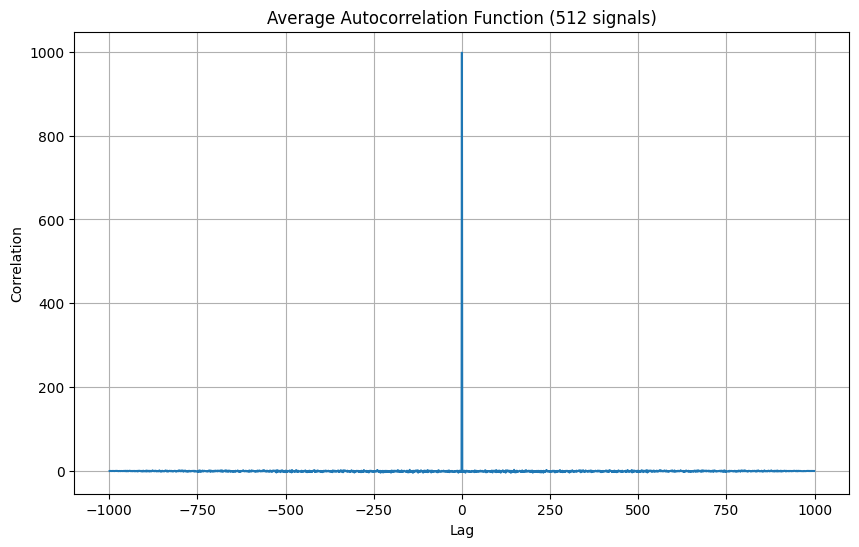


===== Autocorrelation Function (numerical values) =====
Lag -999: -0.0181
Lag -998: 0.1333
Lag -997: 0.0043
Lag -996: -0.0271
Lag -995: -0.0211
Lag -994: -0.1031
Lag -993: 0.0522
Lag -992: -0.1214
Lag -991: 0.1024
Lag -990: -0.0282


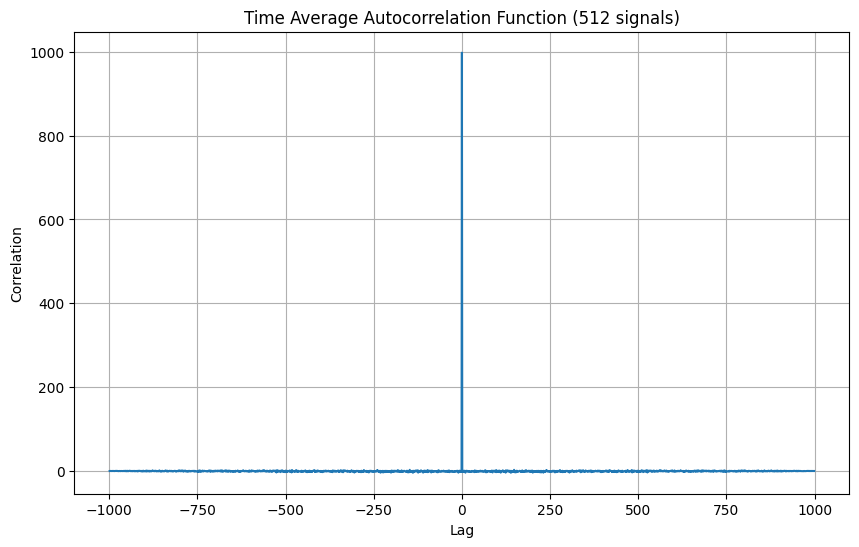


===== Time Average Correlation (numerical values) =====
Lag -999: -0.0181
Lag -998: 0.1333
Lag -997: 0.0043
Lag -996: -0.0271
Lag -995: -0.0211
Lag -994: -0.1031
Lag -993: 0.0522
Lag -992: -0.1214
Lag -991: 0.1024
Lag -990: -0.0282


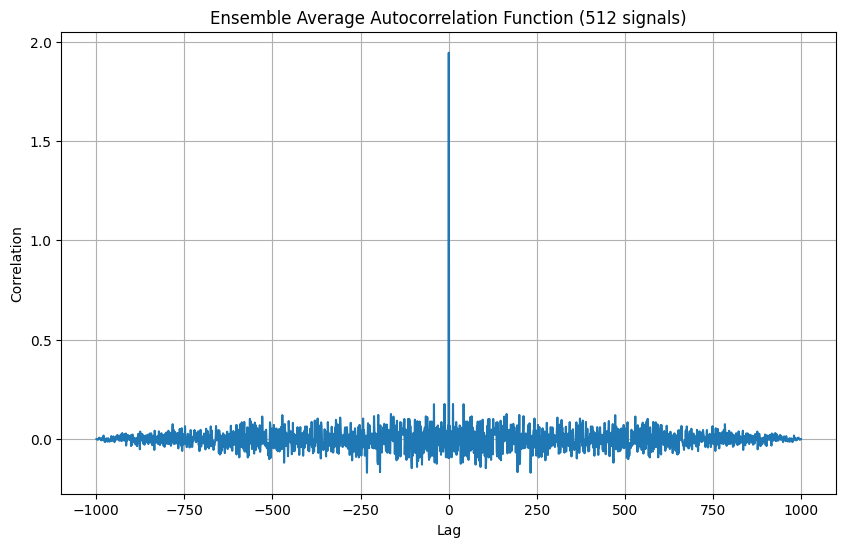


===== Ensemble Average Correlation (numerical values) =====
Lag -999: -0.0000
Lag -998: -0.0001
Lag -997: -0.0011
Lag -996: -0.0035
Lag -995: -0.0035
Lag -994: 0.0001
Lag -993: 0.0038
Lag -992: 0.0065
Lag -991: 0.0062
Lag -990: 0.0063


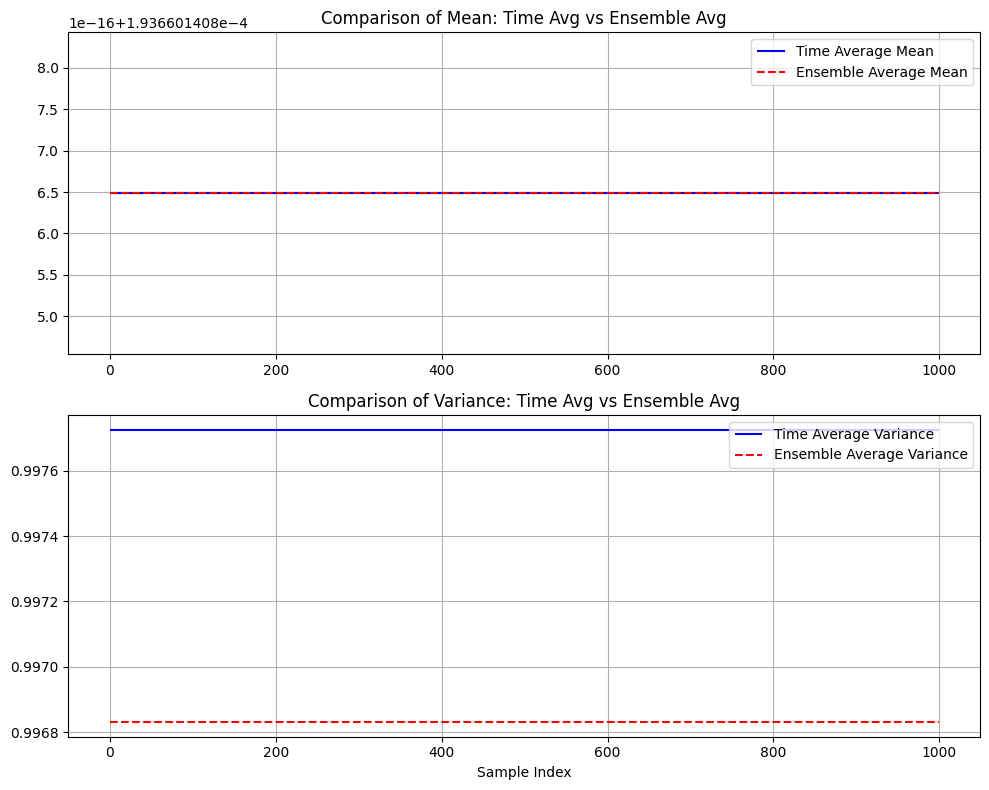

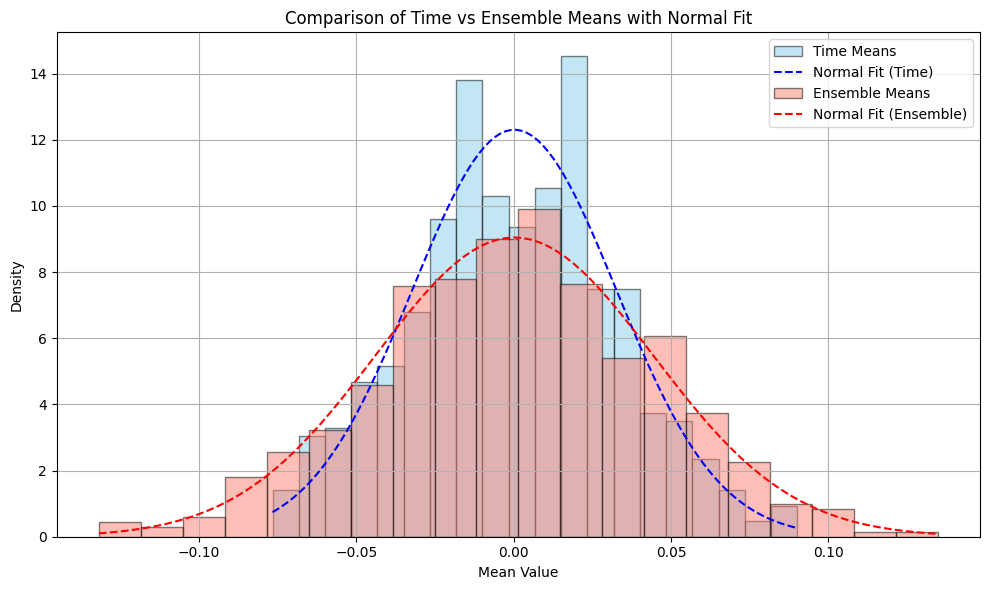

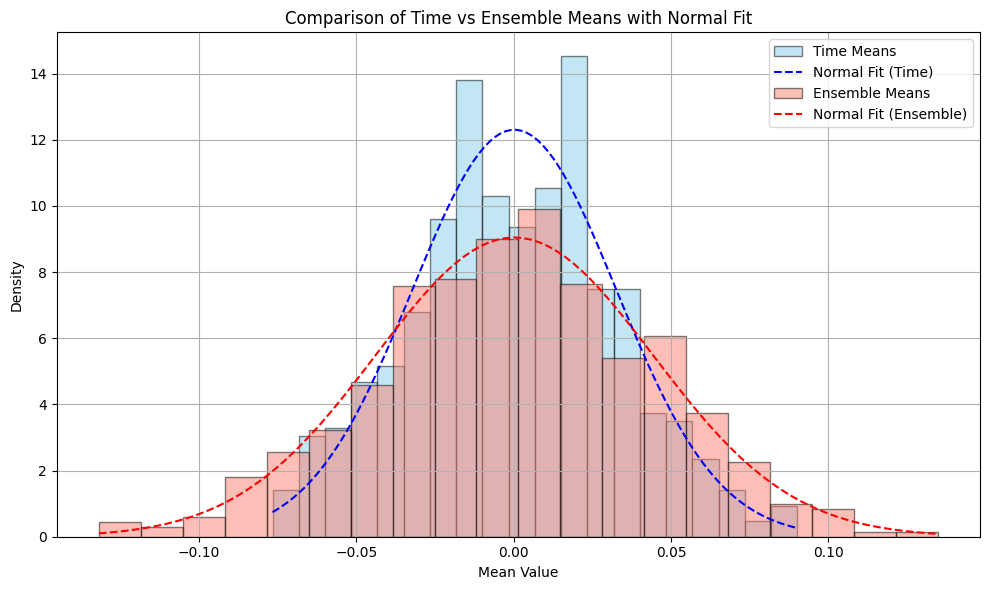

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical operations and generating random numbers
import matplotlib.pyplot as plt  # For plotting
from scipy.stats import norm
# Define a class to encapsulate signal analysis functionality
class RandomSignalAnalyzer:
    def __init__(self, num_signals=512, signal_length=1000, mean=0, std_dev=1):
        # Initialize class parameters
        self.num_signals = num_signals          # Number of signals to generate
        self.signal_length = signal_length      # Number of samples per signal
        self.mean = mean                        # Mean of Gaussian distribution
        self.std_dev = std_dev                  # Standard deviation of the distribution
        self.signals = None                     # Placeholder to store generated signals

    def generate_signals(self):
        """Generates Gaussian random signals (num_signals x signal_length)."""
        self.signals = np.random.normal(
            loc=self.mean,
            scale=self.std_dev,
            size=(self.num_signals, self.signal_length)
        )

    def plot_some_signals(self, num_to_plot=5):
        """Plots the first 'num_to_plot' signals, one per figure."""
        for i in range(num_to_plot):
            plt.figure()
            plt.plot(self.signals[i])  # Plot individual signal
            plt.title(f"Signal {i+1}")
            plt.xlabel("Sample")
            plt.ylabel("Amplitude")
            plt.grid(True)
            plt.show()

    def compute_time_averages(self):
        """Computes time averages (mean & variance) for each signal."""
        self.time_means = np.mean(self.signals, axis=1)  # Mean over time for each signal
        self.time_vars = np.var(self.signals, axis=1)    # Variance over time for each signal
        self.time_mean_avg = np.mean(self.time_means)    # Average of time means
        self.time_var_avg = np.mean(self.time_vars)      # Average of time variances

    def compute_ensemble_averages(self):
        """Computes ensemble averages at each time point."""
        self.ensemble_means = np.mean(self.signals, axis=0)  # Mean across signals at each time index
        self.ensemble_vars = np.var(self.signals, axis=0)    # Variance across signals at each time index
        self.ensemble_mean_avg = np.mean(self.ensemble_means)  # Average over all ensemble means
        self.ensemble_var_avg = np.mean(self.ensemble_vars)    # Average over all ensemble variances

    #print the numerical values of each one of the average obtained
    def print_results(self):
        """Displays the mean and variance (time & ensemble) in numerical form."""
        print("===== TIME AVERAGE (512 signals) =====")
        print(f"Average Time Mean: {self.time_mean_avg:.4f}")
        print(f"Average Time Variance: {self.time_var_avg:.4f}")

        print("\n===== ENSEMBLE AVERAGE (1000 time points) =====")
        print(f"Average Ensemble Mean: {self.ensemble_mean_avg:.4f}")
        print(f"Average Ensemble Variance: {self.ensemble_var_avg:.4f}")

    #Test to prove if the process is ergodic or not
    def compare_ergodicity(self, tolerance=0.05):
        """Checks how close the time and ensemble averages are."""
        mean_diff = abs(self.time_mean_avg - self.ensemble_mean_avg)
        var_diff = abs(self.time_var_avg - self.ensemble_var_avg)

        print("\n===== ERGODICITY COMPARISON =====")
        print(f"Difference in Mean: {mean_diff:.6f}")
        print(f"Difference in Variance: {var_diff:.6f}")

        if mean_diff < tolerance and var_diff < tolerance:
            print("✅ The process is approximately *ergodic* (time avg ≈ ensemble avg)")
        else:
            print("❌ The process is likely *non-ergodic* (significant differences)")


    def plot_histograms(self):
        """Plots histograms of means and variances for both time and ensemble."""
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 2, 1)
        plt.hist(self.time_means, bins=20, color='skyblue', edgecolor='black')
        plt.title("Histogram of Time Means (512 signals)")

        plt.subplot(2, 2, 2)
        plt.hist(self.time_vars, bins=20, color='lightgreen', edgecolor='black')
        plt.title("Histogram of Time Variances (512 signals)")

        plt.subplot(2, 2, 3)
        plt.hist(self.ensemble_means, bins=20, color='salmon', edgecolor='black')
        plt.title("Histogram of Ensemble Means (1000 time points)")

        plt.subplot(2, 2, 4)
        plt.hist(self.ensemble_vars, bins=20, color='orange', edgecolor='black')
        plt.title("Histogram of Ensemble Variances (1000 time points)")

        plt.tight_layout()
        plt.show()


    def calculate_correlation(self):
        """Calculates average autocorrelation over all signals."""
        correlations = []
        lags = np.arange(-self.signal_length + 1, self.signal_length)

        for signal in self.signals:
            signal_corr = np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')
            correlations.append(signal_corr)

        correlations = np.array(correlations)
        avg_correlation = np.mean(correlations, axis=0)

        plt.figure(figsize=(10, 6))
        plt.plot(lags, avg_correlation)
        plt.title("Average Autocorrelation Function (512 signals)")
        plt.xlabel("Lag")
        plt.ylabel("Correlation")
        plt.grid(True)
        plt.show()

        print("\n===== Autocorrelation Function (numerical values) =====")
        for i in range(10):
            print(f"Lag {lags[i]}: {avg_correlation[i]:.4f}")

    def calculate_time_average_correlation(self):
        """Computes time-average correlation for each signal and averages them."""
        time_averages = np.mean(self.signals, axis=1)
        correlations = []
        lags = np.arange(-self.signal_length + 1, self.signal_length)

        for signal, time_avg in zip(self.signals, time_averages):
            signal_corr = np.correlate(signal - time_avg, signal - time_avg, mode='full')
            correlations.append(signal_corr)

        correlations = np.array(correlations)
        avg_time_corr = np.mean(correlations, axis=0)

        plt.figure(figsize=(10, 6))
        plt.plot(lags, avg_time_corr)
        plt.title("Time Average Autocorrelation Function (512 signals)")
        plt.xlabel("Lag")
        plt.ylabel("Correlation")
        plt.grid(True)
        plt.show()

        print("\n===== Time Average Correlation (numerical values) =====")
        for i in range(10):
            print(f"Lag {lags[i]}: {avg_time_corr[i]:.4f}")

    def calculate_ensemble_average_correlation(self):
        """Computes autocorrelation of the ensemble average signal."""
        ensemble_avg_signal = np.mean(self.signals, axis=0)
        lags = np.arange(-self.signal_length + 1, self.signal_length)

        ensemble_corr = np.correlate(
            ensemble_avg_signal - np.mean(ensemble_avg_signal),
            ensemble_avg_signal - np.mean(ensemble_avg_signal),
            mode='full'
        )

        plt.figure(figsize=(10, 6))
        plt.plot(lags, ensemble_corr)
        plt.title("Ensemble Average Autocorrelation Function (512 signals)")
        plt.xlabel("Lag")
        plt.ylabel("Correlation")
        plt.grid(True)
        plt.show()

        print("\n===== Ensemble Average Correlation (numerical values) =====")
        for i in range(10):
            print(f"Lag {lags[i]}: {ensemble_corr[i]:.4f}")

    def plot_average_comparison(self):
        """Plots horizontal lines comparing time and ensemble averages for mean and variance."""
        fig, axs = plt.subplots(2, 1, figsize=(10, 8))

        axs[0].hlines(self.time_mean_avg, 0, self.signal_length - 1, colors='blue', label='Time Average Mean')
        axs[0].hlines(self.ensemble_mean_avg, 0, self.signal_length - 1, colors='red', linestyles='dashed', label='Ensemble Average Mean')
        axs[0].set_title('Comparison of Mean: Time Avg vs Ensemble Avg')
        axs[0].legend()
        axs[0].grid(True)

        axs[1].hlines(self.time_var_avg, 0, self.signal_length - 1, colors='blue', label='Time Average Variance')
        axs[1].hlines(self.ensemble_var_avg, 0, self.signal_length - 1, colors='red', linestyles='dashed', label='Ensemble Average Variance')
        axs[1].set_title('Comparison of Variance: Time Avg vs Ensemble Avg')
        axs[1].set_xlabel('Sample Index')
        axs[1].legend()
        axs[1].grid(True)

        plt.tight_layout()
        plt.show()

    from scipy.stats import norm  # Asegúrate de tener este importado al inicio

    def plot_gaussian_comparison(self):
      """Compara Time y Ensemble Means en una sola gráfica con curva normal."""
      plt.figure(figsize=(10, 6))

      # --- Time Means ---
      mu_tm = np.mean(self.time_means)
      std_tm = np.std(self.time_means)
      x_tm = np.linspace(min(self.time_means), max(self.time_means), 100)
      plt.hist(self.time_means, bins=20, density=True, alpha=0.5, color='skyblue', edgecolor='black', label='Time Means')
      plt.plot(x_tm, norm.pdf(x_tm, mu_tm, std_tm), 'b--', label='Normal Fit (Time)')

      # --- Ensemble Means ---
      mu_em = np.mean(self.ensemble_means)
      std_em = np.std(self.ensemble_means)
      x_em = np.linspace(min(self.ensemble_means), max(self.ensemble_means), 100)
      plt.hist(self.ensemble_means, bins=20, density=True, alpha=0.5, color='salmon', edgecolor='black', label='Ensemble Means')
      plt.plot(x_em, norm.pdf(x_em, mu_em, std_em), 'r--', label='Normal Fit (Ensemble)')

      plt.title("Comparison of Time vs Ensemble Means with Normal Fit")
      plt.xlabel("Mean Value")
      plt.ylabel("Density")
      plt.grid(True)
      plt.legend()
      plt.tight_layout()
      plt.show()

analyzer = RandomSignalAnalyzer()           # Create instance of analyzer
analyzer.generate_signals()                 # Generate 512 random signals
analyzer.plot_some_signals()                # Plot a few of them

analyzer.compute_time_averages()            # Compute time averages
analyzer.compute_ensemble_averages()        # Compute ensemble averages
analyzer.print_results()                    # Print numerical results
analyzer.compare_ergodicity()               # Compare time vs ensemble to check ergodicity
analyzer.plot_histograms()                  # Show histograms of means/variances

analyzer.calculate_correlation()            # Overall autocorrelation
analyzer.calculate_time_average_correlation()  # Time average autocorrelation
analyzer.calculate_ensemble_average_correlation()  # Ensemble autocorrelation

analyzer.plot_average_comparison()          # Final plot to visually compare averages
analyzer.plot_gaussian_comparison()
analyzer.plot_gaussian_comparison()
